In [2]:
import sys
sys.path.append("..")

In [3]:
from utils import DataGenerator, read_annotation_lines
from models import Yolov4
from config import yolo_config
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [3]:
train_lines, val_lines = read_annotation_lines('../dataset/txt/anno-test.txt', test_size=0.1)
FOLDER_PATH = '../dataset/img'

class_name_path = '../class_names/classes.txt'
data_gen_train = DataGenerator(train_lines, class_name_path, FOLDER_PATH)
data_gen_val = DataGenerator(val_lines, class_name_path, FOLDER_PATH)


model = Yolov4(weight_path="G:/download", 
               class_name_path=class_name_path)



nms iou: 0.413 score: 0.3


C:\Users\hojun\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [4]:
CurrentDirectory = "./"

model_directory = CurrentDirectory + 'MODEL/'
tensorboard_directory = CurrentDirectory + 'Tensorboard'

In [5]:
# CheckPoint: Epoch 마다 validation 성능을 검증하여, best performance 일 경우 저장
CP = ModelCheckpoint(filepath=model_directory+'YOLOv4_epoch_-{epoch:03d}-valloss_{val_loss:.4f}.hdf5',
#                      filepath=model_directory+'YOLOv4_epoch_-{epoch:03d}-valloss_{val_loss:.4f}-val_acc{val_acc:.4f}.hdf5',
                        monitor='val_loss', 
                        verbose=1, 
                        save_best_only=True, 
                        mode='min')

# 학습과정 진행사항 확인
TB = TensorBoard(log_dir=tensorboard_directory, 
                        write_graph=True, 
                        write_images=True)

LR = ReduceLROnPlateau(monitor='val_loss',
                        factor=0.8,
                        patience=3, 
                        verbose=1, 
                        min_lr=1e-8)

CALLBACK = [CP, TB, LR]

In [6]:
model.fit(data_gen_train, 
          initial_epoch=0,
          epochs=2, 
          val_data_gen=data_gen_val,
          callbacks=CALLBACK)

TypeError: 'NoneType' object is not subscriptable

In [ ]:
model.predict('../dataset/img/0506234_sc-202337.jpg', random_color=True)

## 클래스 불균형 확인

Breakage<br>
Separated<br>
Crushed<br>
Scratched

In [ ]:
import os
import numpy as np
import collections

In [ ]:
with open('../class_names/train.txt', 'r') as f:
    lines = f.readlines()

# file name 제거
for i in range(len(lines)):
    lines[i] = lines[i].split()
    lines[i].pop(0)

classes_value_count = []

#  분류 번호만 따로 list 에 모음
for line in lines:
    for i in range(len(line)):
        classes_value_count.append(line[i][-1])

collections.Counter(classes_value_count)

## 이미지 리사이즈

In [ ]:
import os
import glob
from PIL import Image

files = glob.glob('../dataset/img/*.jpg')

for f in files:
    img = Image.open(f)
    img_resize = img.resize((400, 300))
    title, ext = os.path.splitext(f)
#     print(title.split('\\'))
    f_path, f_name = title.split('\\')
    img_resize.save(f_path + "/resize_img/" + f_name + '_half_' + ext)

In [ ]:
TEXT_COLOR = (255, 255, 255)
# BOX_COLOR = {'Bus':(200, 0, 0), 'Truck':(0, 0, 200)}

def visualize_bbox(image, bbox, class_name, color=(200, 0, 0), thickness=2):
    x, y, w, h = bbox
    x_min = int(x)
    y_min = int(y)
    x_max = int(x + w)
    y_max = int(y + h)
    
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 1, 2)    
    cv2.rectangle(image, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), color, -1)
    cv2.putText(
        image,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=1, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
        thickness=2,
    )
    return image

In [ ]:
def visualize(image, bboxes, category_names):
    img = image.copy()
    for bbox, category_name in zip(bboxes, category_names):
        class_name = category_name
        img = visualize_bbox(img, bbox, class_name)
    return img

In [ ]:
import os
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
json_files = os.listdir('../dataset/json/')


In [ ]:
from ipywidgets import interact
# @interact(filename = [fn for fn in json_files])
filename = [fn for fn in json_files]
@interact(index = (0, len(filename)))
def temps_show(index):
    with open('../dataset/json/' + filename[index], "r") as f:    # notice the "rb" mode
        d = json.load(f)
    image_id = d['categories']['id']
    file_name = d['images']['file_name']
    image = cv2.imread('../dataset/img' + '/'+file_name)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cate_names = []
    bboxes = []
    for i in range(len(d['annotations'])):
        cate_names.append(d['annotations'][i]['damage'])
        bboxes.append(d['annotations'][i]['bbox'])
    bboxes = np.array(bboxes).astype(int)
    canvas = visualize(image, bboxes, cate_names)
    plt.figure(figsize=(12,12))
    plt.imshow(canvas)
    plt.show()

In [ ]:
!pip install opencv-python

In [ ]:
cv2.__version__

In [ ]:
img = cv2.imread('./0506233_sc-202337.jpg')
result = noisy("s&p", img)
print(result.shape)

cv2.imshow('original', img)
cv2.imshow('result', result)
cv2.waitKey(0)

In [ ]:
import matplotlib.pyplot as plt
img = cv2.imread('./0506233_sc-202337.jpg')
result = noisy("s&p", img)

plt.imshow(result)

In [ ]:
img = cv2.imread('./0506233_sc-202337.jpg')
result = add_rain(img)

plt.imshow(result)

## 영상 적용 후 프레임 단위로 출력

In [1]:
import sys
sys.path.append("..")

from models import Yolov4
from utils import visualize
# from utils import search_save_in_video
import cv2
import numpy as np


In [5]:
class_name_path = '../class_names/classes.txt'
model = Yolov4(weight_path="G:/download/0011-187.7076--316.4698.h5", 
               class_name_path=class_name_path)

nms iou: 0.413 score: 0.3
load from G:/download/0011-187.7076--316.4698.h5


In [ ]:
video_path = "G:/Deep Learning vidio/sample_vedio/sample_video.mp4"
save_path = "G:/Deep Learning vidio/sample_vedio/result1.avi"

In [ ]:
search_save_in_video(video_path, save_path, model)

In [17]:
def search_save_in_video(video_path, save_path, model):
    find_bboxes = 0
    
    vid = cv2.VideoCapture(video_path)
    
    if vid.isOpened() == False:
        print ('Can\'t open the video (%d)' % (video_path))
        exit()

    width = vid.get(cv2.CAP_PROP_FRAME_WIDTH)
    height = vid.get(cv2.CAP_PROP_FRAME_HEIGHT)
    fps = vid.get(cv2.CAP_PROP_FPS)
    fourcc = cv2.VideoWriter_fourcc(*'DIVX')
    
    #파일 stream 생성
    out = cv2.VideoWriter(save_path, fourcc, fps, (int(width), int(height)))
    
    if not out.isOpened():
        print('File open failed!')
        vid.release()
        exit()
    
    while(True):
        ret, frame = vid.read()

        if frame is None:
            break
        
        if (int(vid.get(cv2.CAP_PROP_POS_FRAMES) % 10)) == 0:
            bboxes_df = model.predict_img(frame, random_color=True, plot_img=False, show_text=True, return_output=False, show_shape=False, show_box_count=False)
            # class name
            class_ids = bboxes_df['class_name']
            # bbox x_center, y_center, w, h
            bboxes = np.zeros((len(class_ids), 4))
            bboxes[:, 0] = bboxes_df['x1']
            bboxes[:, 1] = bboxes_df['y1']
            bboxes[:, 2] = bboxes_df['x2']
            bboxes[:, 3] = bboxes_df['y2']

            if len(bboxes) > 0:
                bboxes[:, [0,2]] *= (width/416)
                bboxes[:, [1,3]] *= (height/416)
                result = visualize(frame, bboxes, class_ids)
                find_bboxes = 4
            
            else:
                result = frame
        
        # bbox 를 찾으면 4프레임동안 bbox 표시
        elif find_bboxes > 0:
            result = visualize(frame, bboxes, class_ids)
            find_bboxes -= 1
        else:
            result = frame

        out.write(result)

    #재생 파일 종료
    vid.release()
    #저장 파일 종료
    out.release()


In [5]:
 1 2 3 4 5 6 7 8 9 10 11 12  13 14
         1 0 0 0 0  0 0 0 0 0 0 

nms iou: 0.413 score: 0.3
load from G:/download/0011-187.7076--316.4698.h5


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [21]:
video_path = "G:/Deep Learning vidio/sample_vedio/beginner driving.mp4"
save_path = "G:/Deep Learning vidio/sample_vedio/beginner driving_result.avi"
search_save_in_video(video_path, save_path, model)

1/1 [==============================] - 0s 450ms/step


1/1 [==============================] - 0s 419ms/step


1/1 [==============================] - 1s 557ms/step


1/1 [==============================] - 0s 419ms/step


1/1 [==============================] - 0s 414ms/step


1/1 [==============================] - 0s 415ms/step


1/1 [==============================] - 0s 434ms/step


1/1 [==============================] - 0s 429ms/step


1/1 [==============================] - 0s 435ms/step


1/1 [==============================] - 0s 433ms/step


1/1 [==============================] - 0s 416ms/step


1/1 [==============================] - 0s 438ms/step


1/1 [==============================] - 0s 420ms/step


1/1 [==============================] - 0s 438ms/step


1/1 [==============================] - 0s 427ms/step


1/1 [==============================] - 0s 423ms/step


1/1 [==============================] - 0s 422ms/step


1/1 [==============================] - 0s 424ms/step


img shape:  (600, 800, 3)
# of bboxes: 2


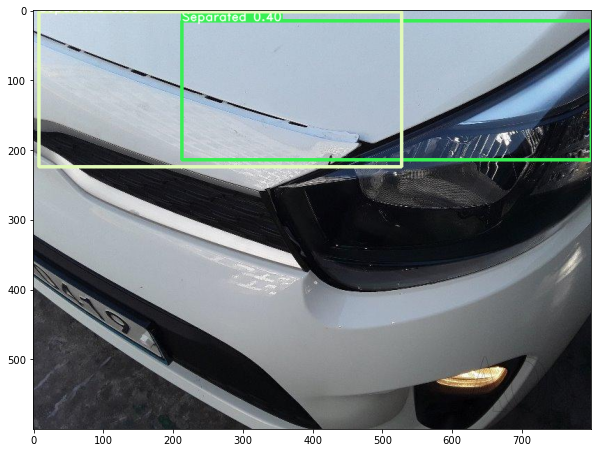

,x1,y1,x2,y2,class_name,score,w,h
0,213,15,800,214,Separated,0.398920,587,199
1,8,2,528,224,Separated,0.359639,520,222


In [5]:
# model.predict('G:/download/0506233_sc-202337.jpg')

In [13]:
import tensorflow as tf
logdir = "G:/download/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir)
%load_ext tensorboard
%tensorboard --logdir=./logs/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
